**<font size= "6"> Courwork 3 - Yiquan Shao**

This document is intended to look the Average sale price of different property in different areas and regions with plots and statistical analysis.

**The table of the contents**  
Section 1: Load and prepare the data  
  1.1 import necessary libraries  
  1.2 Data preparation  
  1.3 Data filtering and processing  

Section 2: Plotting Price Trends  
2.1 Brief introduction with the first plot  
2.2 Comment on the trends
  
  Section 3: Price Changes  
  3.1 Calculation of the change in the price of flats  
  3.2 Comment on the results
  
  Section 4: Statistical Analysis  
  4.1 Interpretation

# 1.Section 1: Load and prepare the data

## 1.1 Import necessary libraries

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

## 1.2 Data preparation

* Read the origianl table of 'average-property-price.csv'， and named **"prices"**.
* Process the data of date into correct format, and named as "Month" column.

In [240]:
types_dict = {'Area':'category', 'Code':'category'}
prices = pd.read_csv('average-property-price.csv', dtype = types_dict)
prices = prices.assign(Month = pd.to_datetime(prices['Date'], dayfirst=True)).drop(labels='Date', axis=1)
prices

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


* Read the origianl table of 'location-codes.csv'， and named as **"codes"**.

In [241]:
codes = pd.read_csv('location-codes.csv')
codes = codes.rename(columns={'AuthorityCode': 'Code'})
codes

,Code,AuthorityName,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East
...,...,...,...,...
149,E10000029,Suffolk,E12000006,East of England
150,E10000030,Surrey,E12000008,South East
151,E10000031,Warwickshire,E12000005,West Midlands
152,E10000032,West Sussex,E12000008,South East


### 1.2.1 Brief introduction of Variables in above tables

The following table shows the variables in the table of prices and codes:  
**Prices** has information about the average price of properties (there are 4 types of properties) over 36 months in different areas of the country.  
**Codes** shows the correlation of code, Area name, Region code and Region name.

| Variable | Meaning |
| ---- | ---- |
| Area |  The name of an area (or region)|
| Code |  The code for the area(or region) |
| Detached |  Average sale price of a detached property in this area in the month |
| Semi |  Same, for semi-detached property |
|Terraced | Same, for a terraced property |
|Flat | Same, for a flat |
|AuthorityName|The name of an area|
|RegionCode| The code for the region |
|RegionName| The name of an region |


## 1.3 Data filtering and processing

* Get the unique value in RegionCode and RegionName from the code table, and put them into the **"codes_region"** table.

In [242]:
codes_region = codes.drop(columns=['Code', 'AuthorityName'])
codes_region = codes_region.drop_duplicates()
codes_region = codes_region.reset_index(drop=True)
codes_region

,RegionCode,RegionName
0,E12000001,North East
1,E12000002,North West
2,E12000003,Yorkshire and The Humber
3,E12000004,East Midlands
4,E12000005,West Midlands
5,E12000009,South West
6,E12000006,East of England
7,E12000008,South East
8,E12000007,London


### 1.3.1 Separate the region data and the area data 

* According to the RegionCode, separate the region data from the original table **price**.
* Get the table of region and call it as **prices_region**.

In [243]:
def isregion(area):
  l = area in {'E12000001', 'E12000002','E12000003','E12000004', 'E12000005'
               ,'E12000006', 'E12000007', 'E12000008', 'E12000009'}
  return l

prices_region = prices.loc[prices['Code'].apply(isregion) == True].copy()
prices_region = prices_region.rename(columns={'Code': 'RegionCode'})
prices_region

,Area,RegionCode,Detached,Semi,Terraced,Flat,Month
5436,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412,2016-09-01
5437,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508,2016-10-01
5438,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739,2016-11-01
5439,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119,2016-12-01
5440,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


* Since the region data has separated from original, the rest data are the area data.
* Get the table of area and call it as **prices_area**.

In [244]:
prices_area = prices.drop(index=(prices_region.index))
prices_area

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01


### 1.3.2 Assign region to area

* We need to add the information of region to the table of **prices_area**.
* Accroding code both in the table of **prices_area** and **codes** as index, add new column of RegionCode and RegionName.
* Get a new table call it as prices_area_codes.

In [245]:
prices_area_codes = pd.merge(prices_area, 
                      codes, 
                      on ='Code', 
                      how ='left')
prices_area_codes = prices_area_codes.drop(columns=['AuthorityName'])
prices_area_codes

,Area,Code,Detached,Semi,Terraced,Flat,Month,RegionCode,RegionName
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01,E12000001,North East
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01,E12000001,North East
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01,E12000001,North East
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01,E12000001,North East
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01,E12000001,North East
...,...,...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01,E12000005,West Midlands
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01,E12000005,West Midlands
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01,E12000005,West Midlands
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01,E12000005,West Midlands


### 1.3.3 Check missing values in tables 

Missing values are shown in the table as the format of NaN

* There is no NaN values in the table of prices_region

In [246]:
nan_values1 = prices_region[prices_region.isna().any(axis=1)]
nan_values1

,Area,RegionCode,Detached,Semi,Terraced,Flat,Month


* We found some NaN values in the table of prices_area_codes

In [247]:
nan_values = prices_area_codes[prices_area_codes.isna().any(axis=1)]
N = nan_values.index
nan_values

,Area,Code,Detached,Semi,Terraced,Flat,Month,RegionCode,RegionName
3276,City of London,E09000001,NaN,NaN,1189233.714,777891.9778,2016-09-01,E12000007,London
3277,City of London,E09000001,NaN,NaN,1195010.116,790055.2118,2016-10-01,E12000007,London
3278,City of London,E09000001,NaN,NaN,1229507.612,815992.8991,2016-11-01,E12000007,London
3279,City of London,E09000001,NaN,NaN,1217012.801,809149.8515,2016-12-01,E12000007,London
3280,City of London,E09000001,NaN,NaN,1227434.570,817654.0898,2017-01-01,E12000007,London
3281,City of London,E09000001,NaN,NaN,1189660.065,818093.5200,2017-02-01,E12000007,London
3282,City of London,E09000001,NaN,NaN,1176573.144,851416.0699,2017-03-01,E12000007,London
3283,City of London,E09000001,NaN,NaN,1238739.417,903551.8492,2017-04-01,E12000007,London
3284,City of London,E09000001,NaN,NaN,1277795.874,937307.4240,2017-05-01,E12000007,London
3285,City of London,E09000001,NaN,NaN,1174213.336,928316.5022,2017-06-01,E12000007,London


#### 1.3.3.1 Process missing values

**Justification**
* NaN may appear because these property types do not exist in London and there is no corresponding price data or just some missing value in the original data set;
* The NaN values in the column are replaced by the mean value of that column to avoid the effect of nulls on the mean and distribution of the whole data of column.

In [248]:
prices_area_codes1 = prices_area_codes.fillna(prices_area_codes.mean(numeric_only=True))
prices_area_codes1.iloc[N]

,Area,Code,Detached,Semi,Terraced,Flat,Month,RegionCode,RegionName
3276,City of London,E09000001,528067.629636,354850.437307,1.189234e+06,777891.9778,2016-09-01,E12000007,London
3277,City of London,E09000001,528067.629636,354850.437307,1.195010e+06,790055.2118,2016-10-01,E12000007,London
3278,City of London,E09000001,528067.629636,354850.437307,1.229508e+06,815992.8991,2016-11-01,E12000007,London
3279,City of London,E09000001,528067.629636,354850.437307,1.217013e+06,809149.8515,2016-12-01,E12000007,London
3280,City of London,E09000001,528067.629636,354850.437307,1.227435e+06,817654.0898,2017-01-01,E12000007,London
3281,City of London,E09000001,528067.629636,354850.437307,1.189660e+06,818093.5200,2017-02-01,E12000007,London
3282,City of London,E09000001,528067.629636,354850.437307,1.176573e+06,851416.0699,2017-03-01,E12000007,London
3283,City of London,E09000001,528067.629636,354850.437307,1.238739e+06,903551.8492,2017-04-01,E12000007,London
3284,City of London,E09000001,528067.629636,354850.437307,1.277796e+06,937307.4240,2017-05-01,E12000007,London
3285,City of London,E09000001,528067.629636,354850.437307,1.174213e+06,928316.5022,2017-06-01,E12000007,London


# 2. Section 2: Plotting Price Trends

* Plot trends of the prices(only flats and detached properties);
* The plots cover the prices in the 9 regions over the 36 months.

In [249]:
prices_region = prices_region.set_index('Month')
prices_region = prices_region.replace({"West Midlands Region":"West Midlands"})

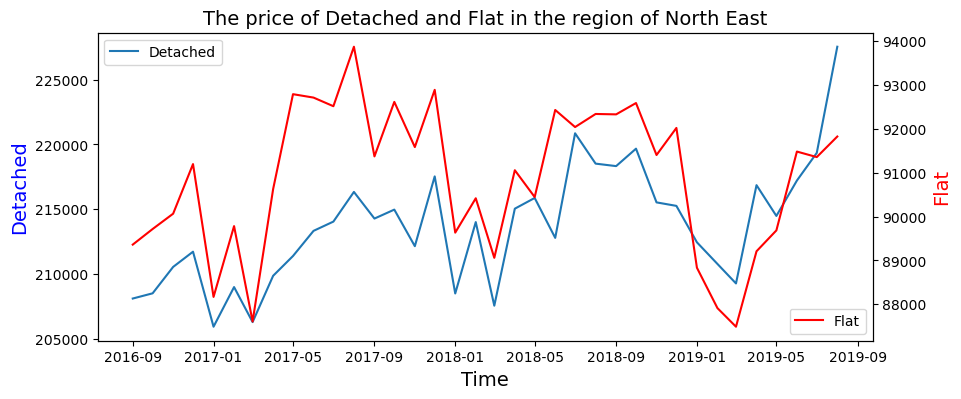

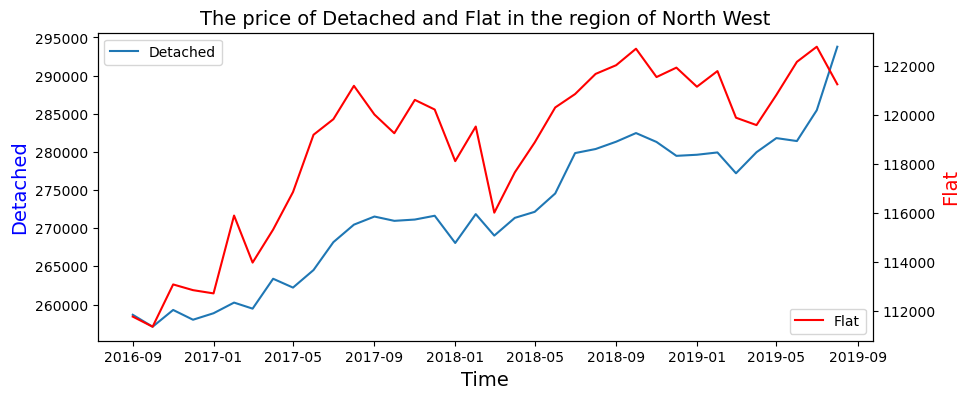

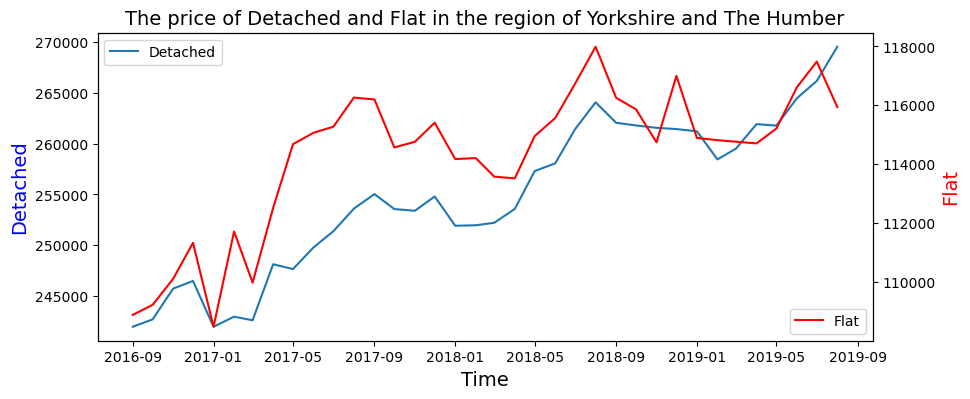

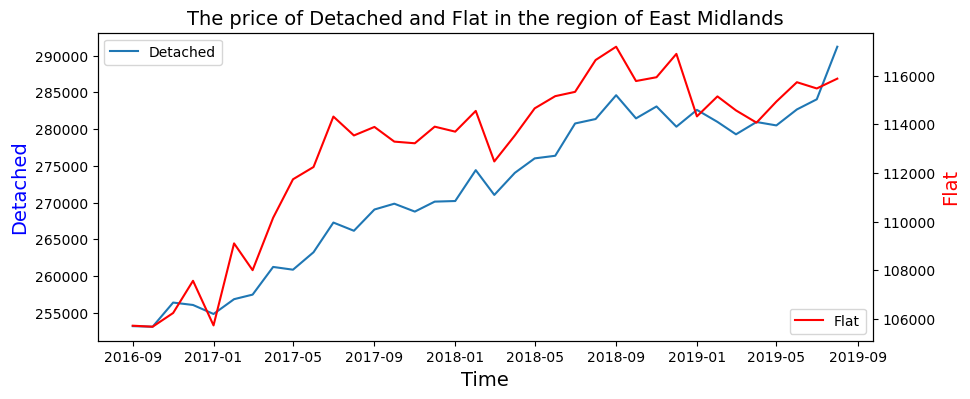

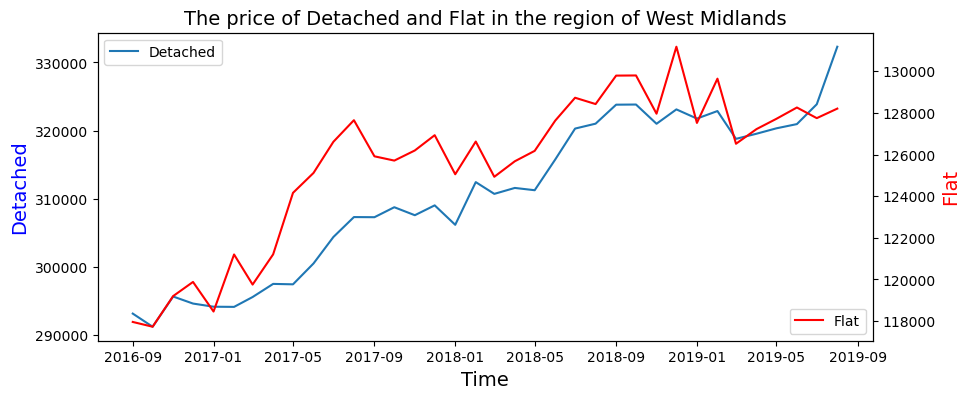

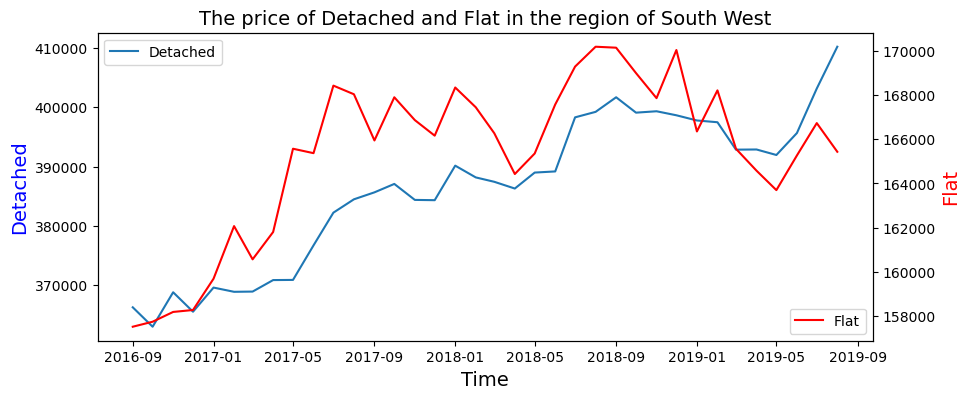

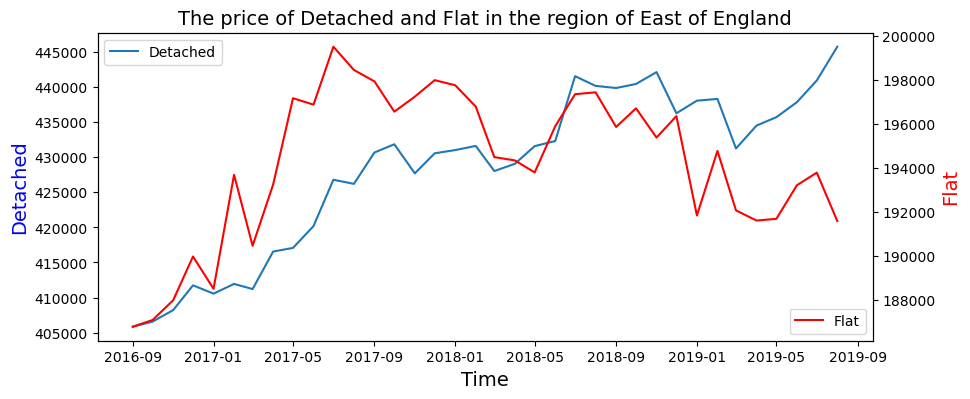

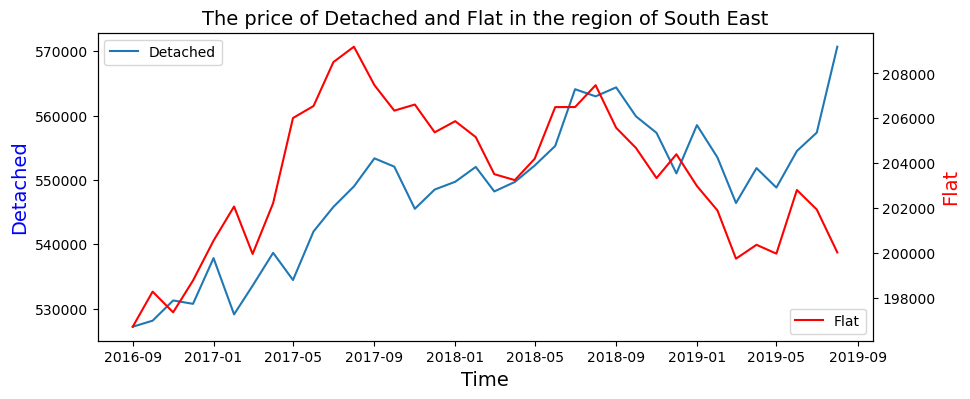

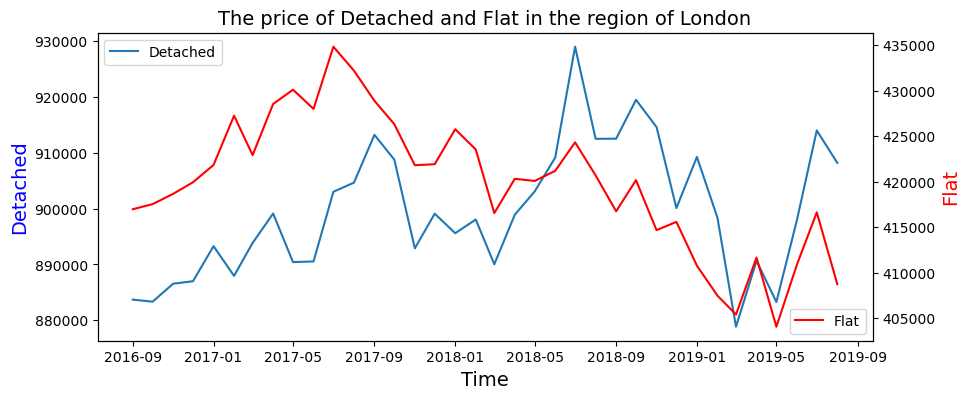

In [250]:
Region = codes_region.RegionName.tolist()
for i in Region:
    a = prices_region.loc[(prices_region.Area == i)]
    fig, a1 = plt.subplots(1, 1, figsize=(10, 4))
    a1.plot(a.loc[:,'Detached'], label='Detached')
    a2 = a1.twinx()
    a2.plot(a.loc[:,'Flat'], color='r', label = 'Flat')
    a1.legend(loc="upper left")
    a2.legend(loc="lower right")
    a1.set_ylabel('Detached', fontsize=14, color='b')
    a1.set_xlabel('Time', fontsize=14)
    a2.set_ylabel('Flat', fontsize=14, color='r')
    a1.set_title('The price of Detached and Flat in the region of {r}'.format(r=i), fontsize=14)

## 2.1 Brief introduction with the first plot

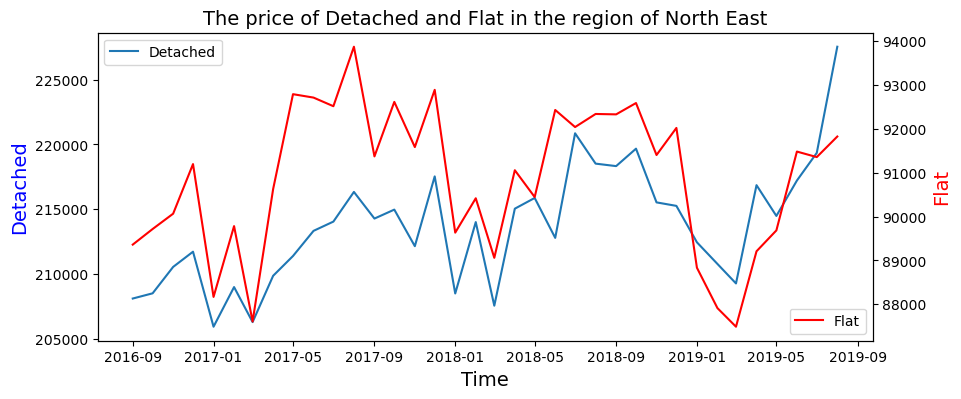

In [251]:
for i in Region:
    a = prices_region.loc[(prices_region.Area == i)]
    fig, a1 = plt.subplots(1, 1, figsize=(10, 4))
    a1.plot(a.loc[:,'Detached'], label='Detached')
    a2 = a1.twinx()
    a2.plot(a.loc[:,'Flat'], color='r', label = 'Flat')
    a1.legend(loc="upper left")
    a2.legend(loc="lower right")
    a1.set_ylabel('Detached', fontsize=14, color='b')
    a1.set_xlabel('Time', fontsize=14)
    a2.set_ylabel('Flat', fontsize=14, color='r')
    a1.set_title('The price of Detached and Flat in the region of {r}'.format(r=i), fontsize=14)
    break

* This is a line graph of property prices over time in the North East Region;
* Left is the first axis of x represents the price of Detached was drawn in blue line;
* Right is the second axis of x represents the price of Flat was drawn in red line;
* Time of different months as y axis;
* From this plot we can see the fluctuation of two different room types in different months from 2016 to 2019 in North East Region.

## 2.2 Comment on the trends

* Price fluctuations for both property types are quite similar in all regions.
* Time(2019.07 - 2019.09) Price fluctuations of Detached and Flat have contrary price fluctuation in these areas(North west, South east, East of England, South west, Yorkshire and The Humber)
* Time(2018.09 - 2019.03) prices fell in all regions, this trend is more obvious in these areas(North east, London, South east).
* Time(2017.03 - 2017.08) prices rise in all regions, this trend is more obvious in these areas(North east, South east, East of England).
* East Midlands and West Midlands have a more stable price fluctuation than other regions.
* In terms of the whole statistical time, both property prices have generally risen(except London).

# 3. Section 3: Price Changes

## 3.1 Calculation of the change in the price of flats

* Filter Month(2017-07-01 & 2018-07-01) in the table of **"prices_area_codes"**.

In [252]:
prices_area_codes_1718 = prices_area_codes.loc[(prices_area_codes.Month == '2017-07-01') | (prices_area_codes.Month == '2018-07-01')]
prices_area_codes_1718

,Area,Code,Detached,Semi,Terraced,Flat,Month,RegionCode,RegionName
10,Hartlepool,E06000001,186030.1497,112168.0127,79436.27053,65007.84170,2017-07-01,E12000001,North East
22,Hartlepool,E06000001,180836.5829,108917.0807,76843.00978,61116.82158,2018-07-01,E12000001,North East
46,Middlesbrough,E06000002,187695.9901,111107.0273,79505.65683,69163.06963,2017-07-01,E12000001,North East
58,Middlesbrough,E06000002,195242.2776,114478.7800,81719.20818,69313.90788,2018-07-01,E12000001,North East
82,Redcar and Cleveland,E06000003,187618.3790,117895.4611,89473.56935,65507.80990,2017-07-01,E12000001,North East
...,...,...,...,...,...,...,...,...,...
5350,Warwickshire,E10000031,399930.9556,235098.5494,194531.76610,167470.71860,2018-07-01,E12000005,West Midlands
5374,West Sussex,E10000032,529397.3694,342983.0789,276630.46710,193547.45490,2017-07-01,E12000008,South East
5386,West Sussex,E10000032,545859.8494,353171.1349,283575.16210,191835.79530,2018-07-01,E12000008,South East
5410,Worcestershire,E10000034,344510.0489,210180.4502,166865.00150,127758.55150,2017-07-01,E12000005,West Midlands


* Then use 'RegionName','Area' as index, "Month" as column, "Flat" as values to get the pivot table call as **"p1"**.

In [253]:
p1 = prices_area_codes_1718.pivot_table(values = ['Flat'], index=['RegionName','Area'], columns=['Month']).loc[:,"Flat"]
p1

Month                                          2017-07-01    2018-07-01
RegionName               Area                                          
East Midlands            City of Derby        95940.21897   96708.36963
                         City of Nottingham  108859.84530  110295.36520
                         Derbyshire          115450.93520  117801.62630
                         Leicester           120506.20300  125824.12160
                         Leicestershire      122325.99780  125042.02740
...                                                   ...           ...
Yorkshire and The Humber North Yorkshire     138034.75480  138503.30320
                         Rotherham            80127.94712   82237.41396
                         Sheffield           109118.56590  112189.50390
                         Wakefield            85260.35706   84010.08176
                         York                170189.00160  168546.50340

[151 rows x 2 columns]

* Continue to process the price data of flat on the basis of **"p1"**;
* Use the values of 2018 minus these of 2017 and put these into a new column **"ChangeValue"**;
* If values in **"ChangeValue"** are positive means increase, otherwise means decrease, generate a new column accordingly call it "Change".
* Hence, we get the final table call it as **"p2"**.

In [254]:
p2 = p1.reset_index()
p2.set_axis(["Region", "Area", "Flat2017", "Flat2018"], axis='columns', inplace=True)
p2 = p2.set_index("Area")
p2 = p2.assign(ChangeValue = p2.iloc[:,2] - p2.iloc[:,1])
def trend(row):
    if (row.ChangeValue > 0) : return 'Increase'
    if (row.ChangeValue < 0) : return 'Decrease'
    return 'No Change'   
p2 = p2.assign(Change = p2.apply(trend, axis=1))
p2 = p2.sort_values([#'Region', 
    'ChangeValue'], ascending=[#True,
    False])
p2

,Region,Flat2017,Flat2018,ChangeValue,Change
Area,,,,,
Kensington And Chelsea,London,1.151310e+06,1.169146e+06,17836.1370,Increase
Merton,London,3.935750e+05,4.028330e+05,9257.9869,Increase
Manchester,North West,1.495963e+05,1.584618e+05,8865.4781,Increase
Slough,South East,2.258823e+05,2.324851e+05,6602.7492,Increase
Bournemouth,South West,1.749021e+05,1.804838e+05,5581.7050,Increase
...,...,...,...,...,...
Wandsworth,London,5.419001e+05,5.152079e+05,-26692.1932,Decrease
Southwark,London,4.644877e+05,4.363404e+05,-28147.3365,Decrease
Camden,London,7.851798e+05,7.555432e+05,-29636.5920,Decrease


 ## 3.2 Visualise the change in area prices in each region

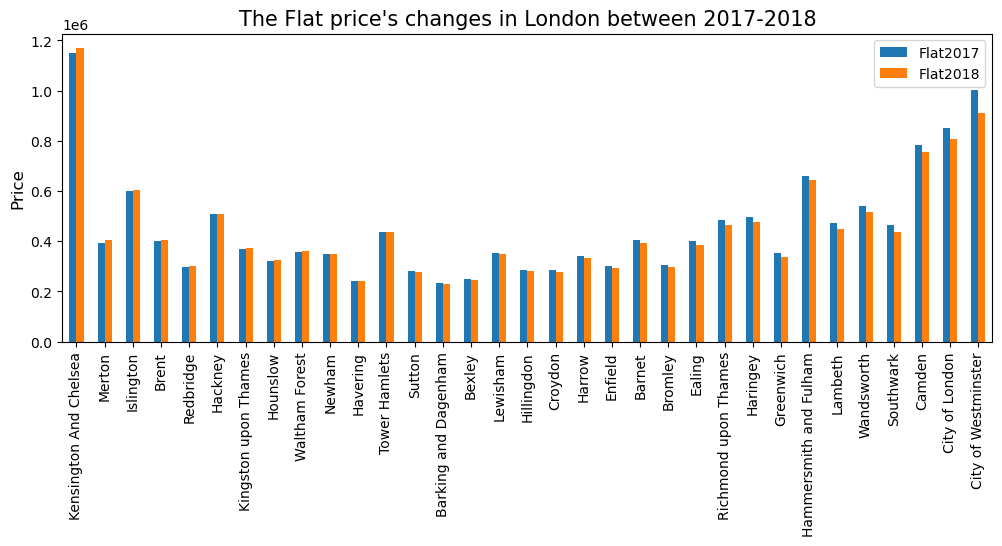

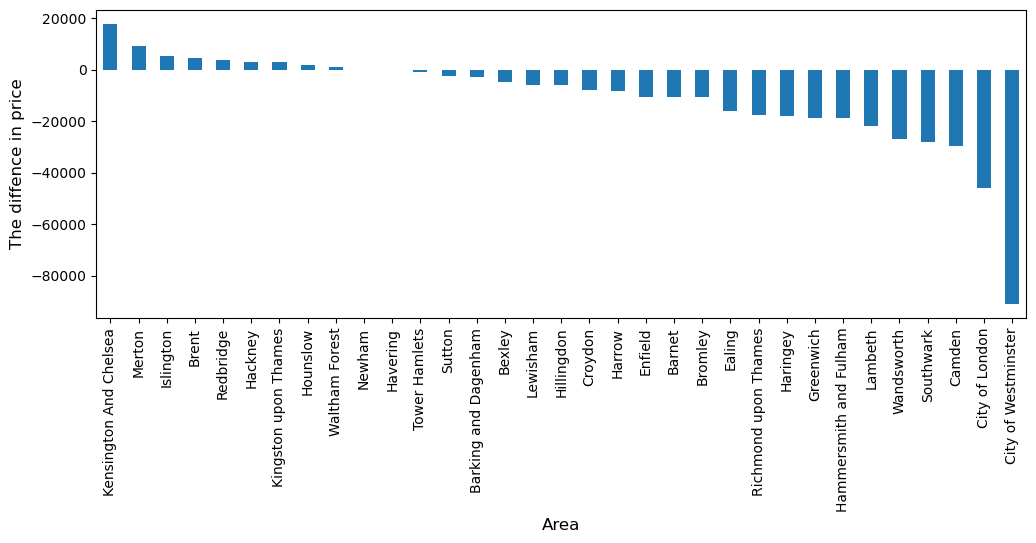

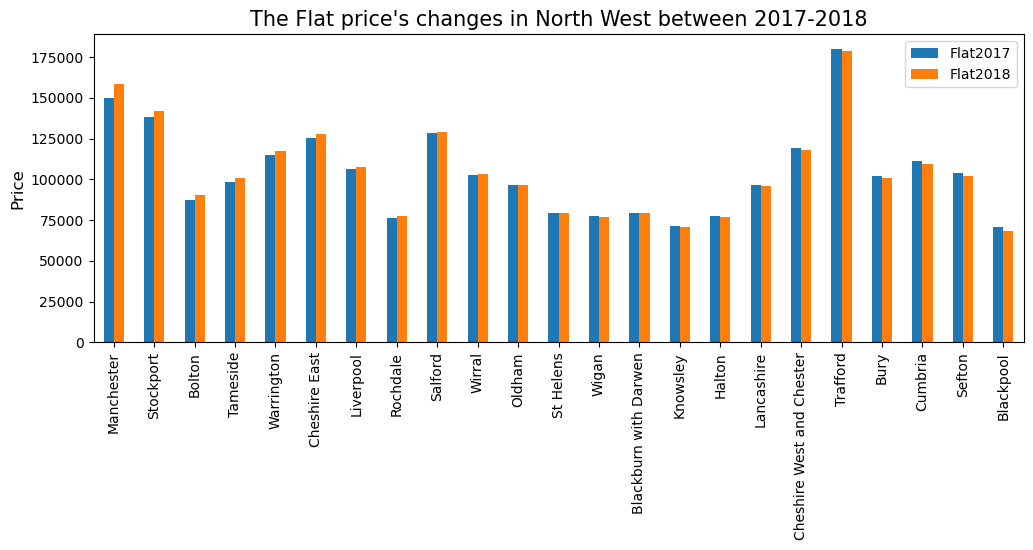

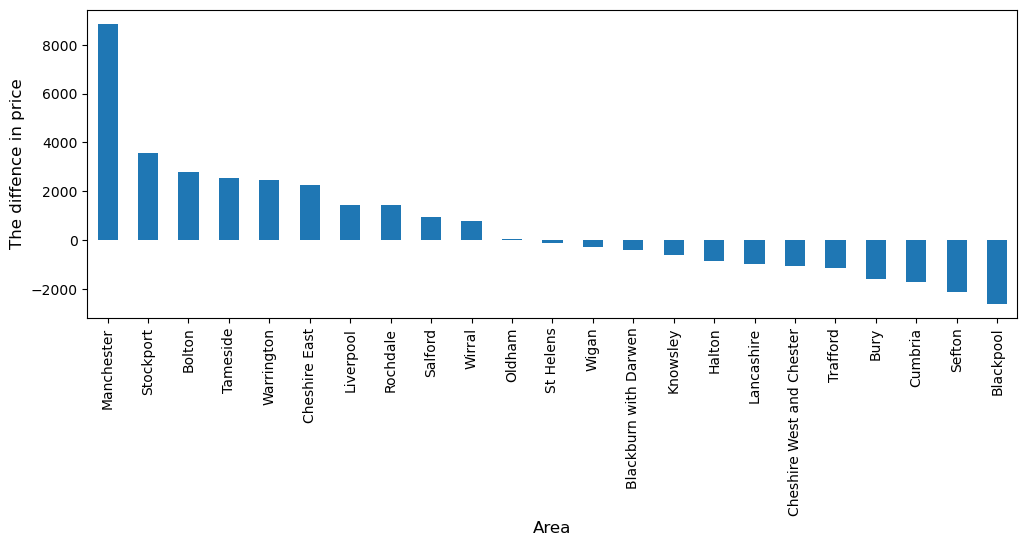

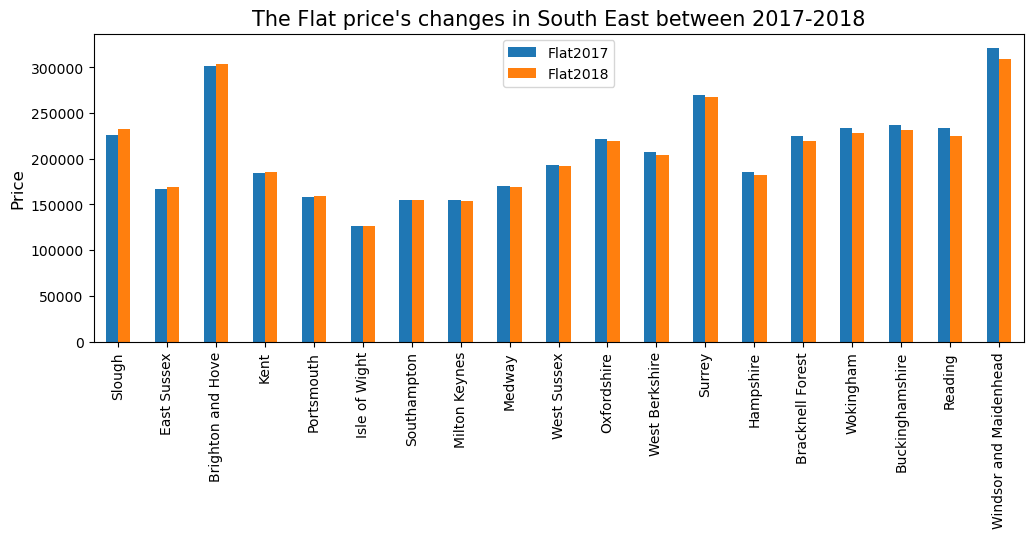

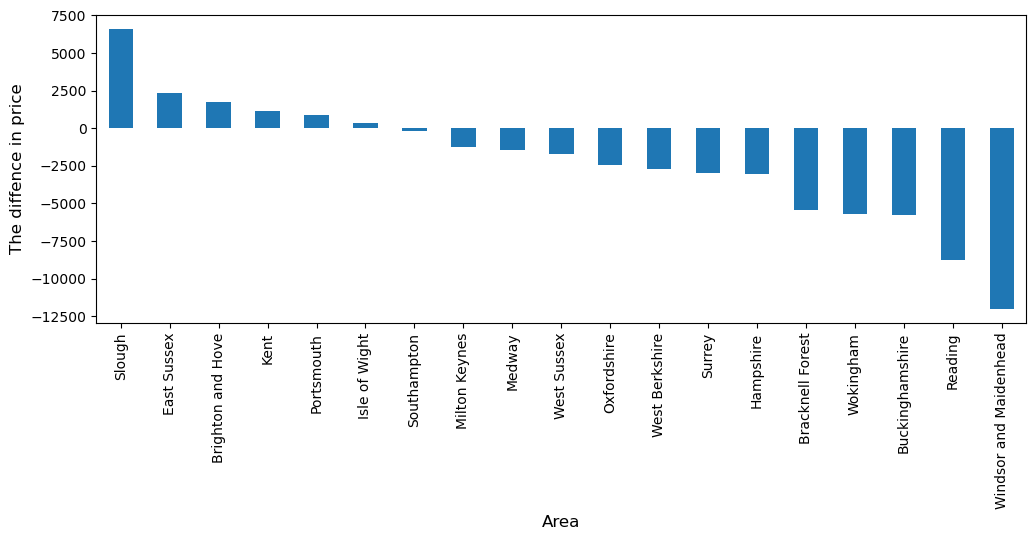

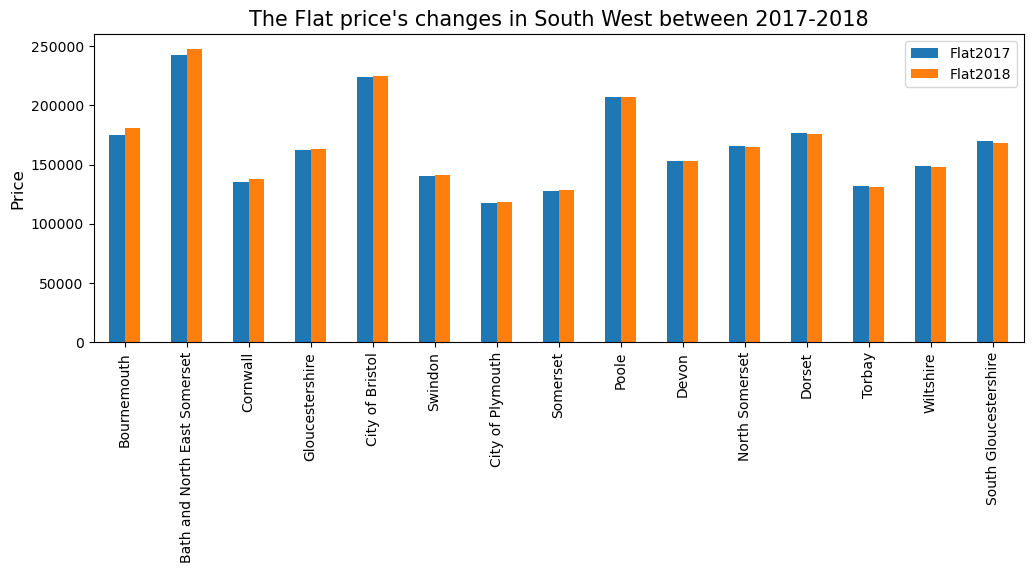

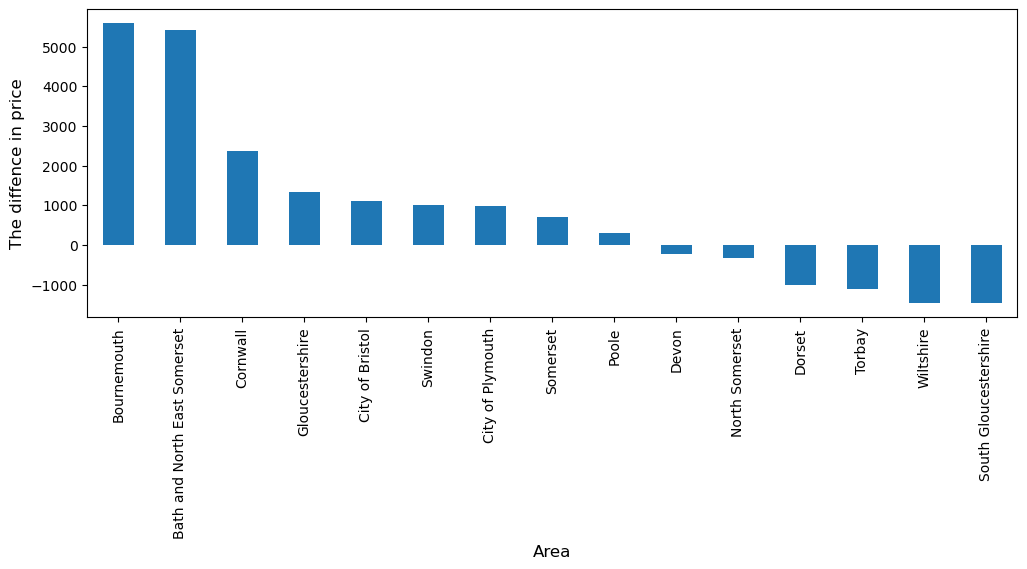

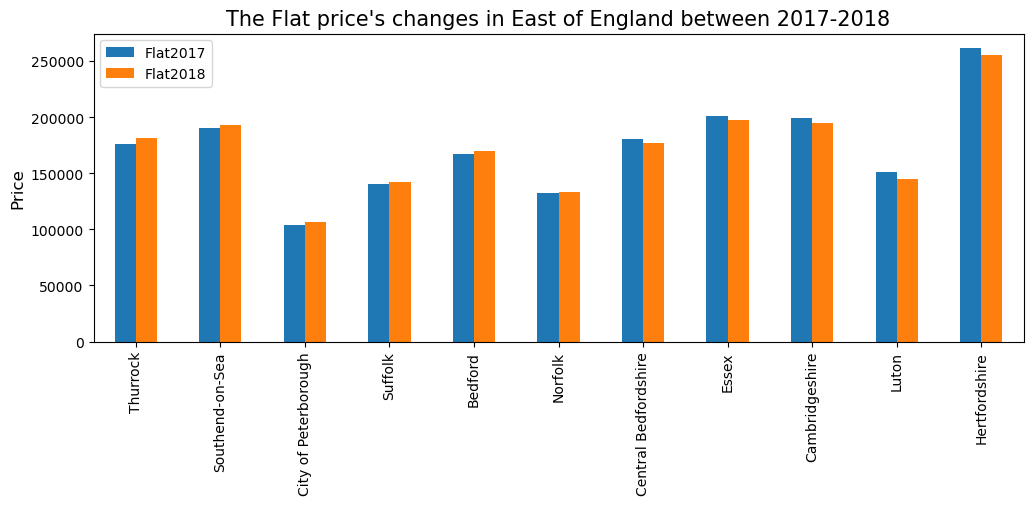

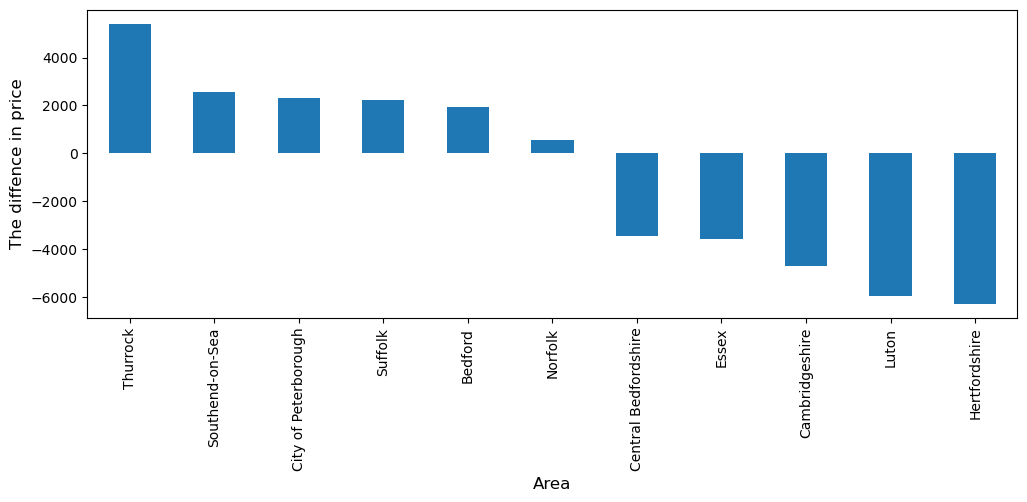

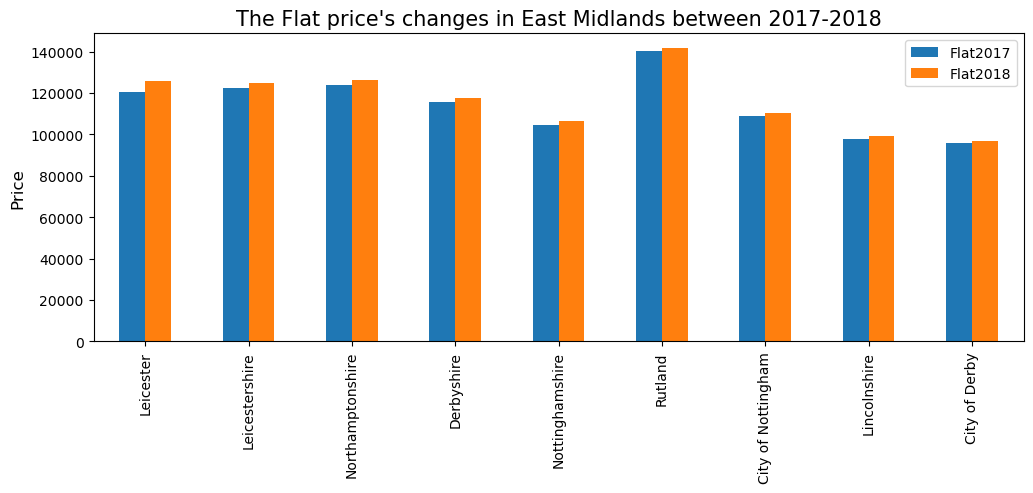

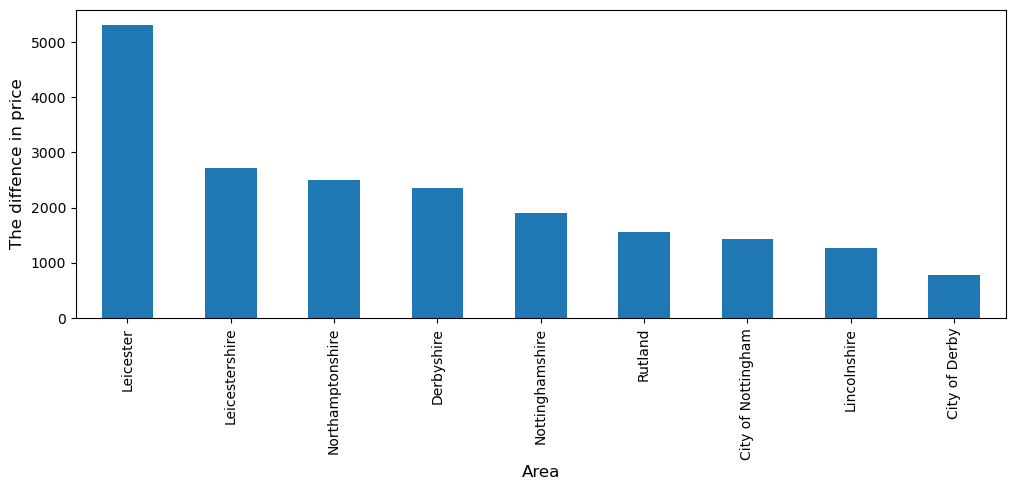

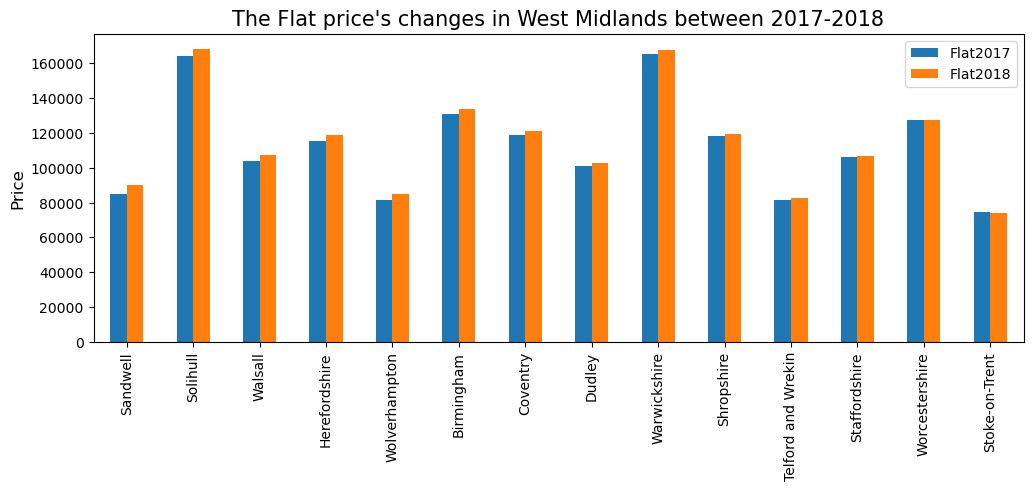

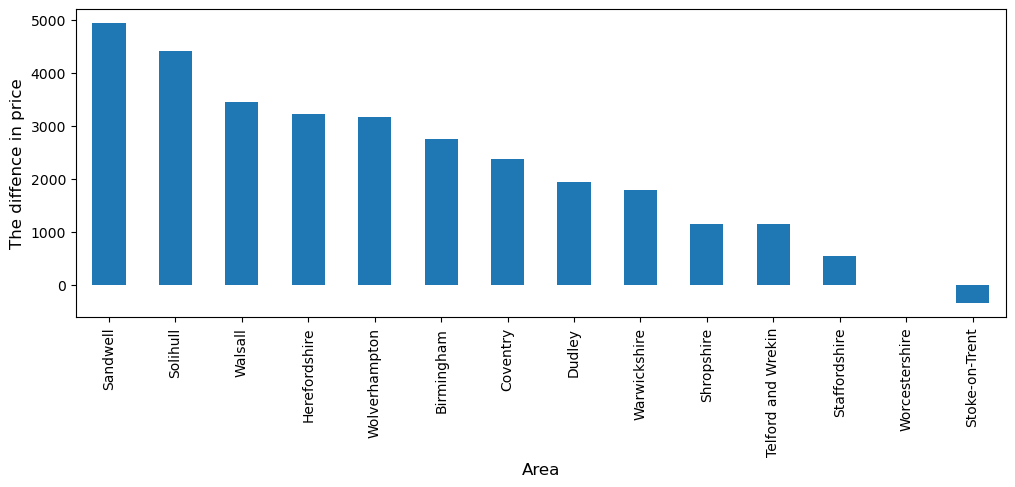

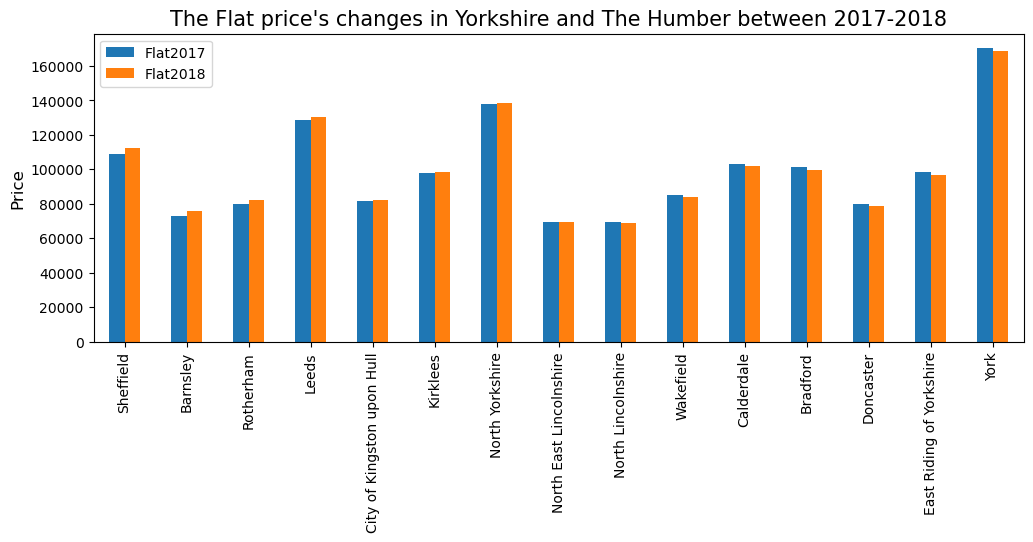

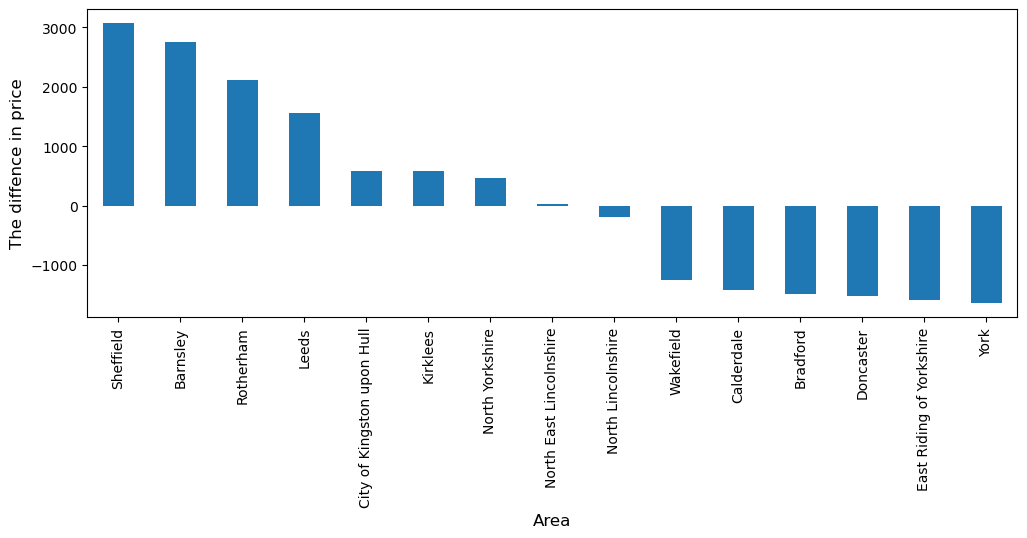

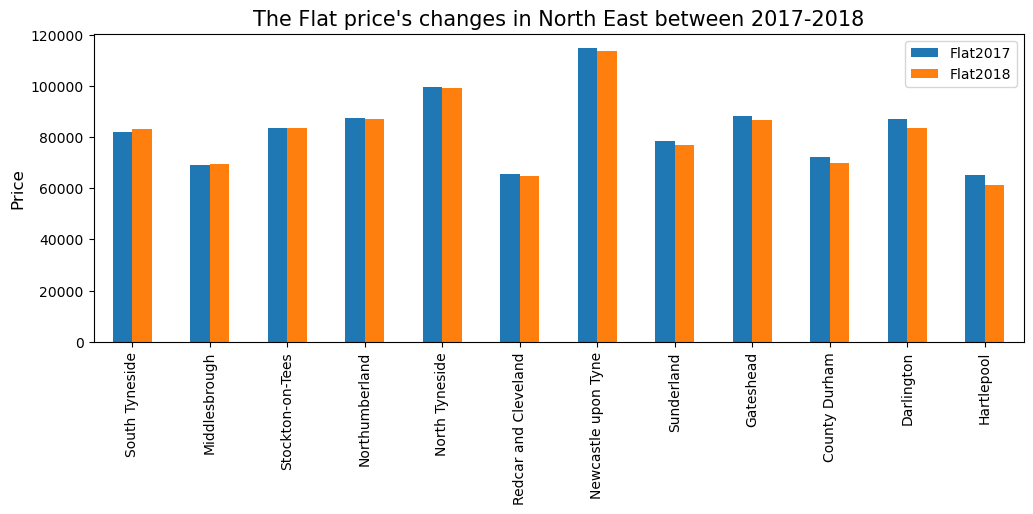

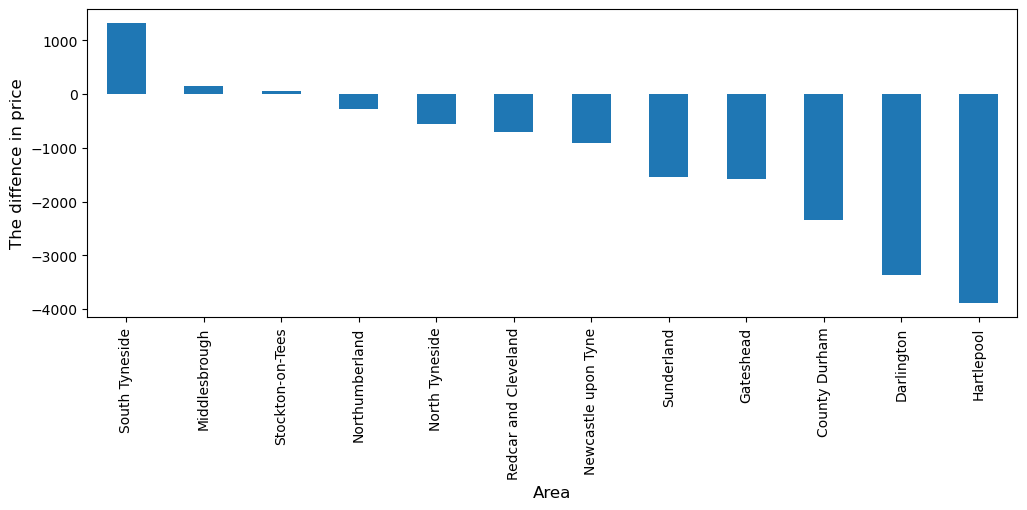

In [255]:
Region1 = p2.Region.unique().tolist()
for i in Region1:
    p2.loc[(p2.Region == i)].loc[:,["Flat2017","Flat2018"]].plot(kind="bar",figsize=(12, 4))
    plt.ylabel("Price", fontsize=12)
    plt.xlabel("")
    plt.title("The Flat price's changes in {q} between 2017-2018".format(q=i),fontsize=15)
    plt.show()
    p2.loc[(p2.Region == i)].loc[:,'ChangeValue'].plot(kind="bar",figsize=(12, 4))
    plt.ylabel("The diffence in price",fontsize=12)
    plt.xlabel("Area", fontsize=12)
    plt.show()

## 3.2 Comment on the results

* **Regions(West Midlands, South West, East Midlands)** have **positive** price change in most areas;
* **Regions(London, North East, South East)** have **negative** price change in most areas;
* Average rise and fall in other regions' areas;
* The area with the biggest price drop is City of Westminster in London(-90900.29);
* The area with the biggest price rise is Kensington And Chelsea in London(17836.14).

# 4. Section 4: Statistical Analysis

* Use the column of "Change" and "Region" in the table of **"p2"** create crosstab.

In [256]:
crosstab = pd.crosstab(p2['Change'],p2['Region'])
crosstab

Region,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Change,,,,,,,,,
Decrease,0,5,23,9,12,13,6,2,7
Increase,9,6,10,3,11,6,9,12,8


* Using the chi-square statistics to determine if two categorical variables("Change" and "Region") are correlated.

In [257]:
test_stat, p_value, dof, expected = stats.chi2_contingency(crosstab, correction=False)

print('There are %d degrees of freedom' % dof)
print('The chi-squared test statistic is %4.2f' % test_stat)
print('The p-value of this chi-square is %4.3f %%' % (100 * p_value))

There are 8 degrees of freedom
The chi-squared test statistic is 27.60
The p-value of this chi-square is 0.056 %


The null hypothesis ( 𝐻0 ) is that Region not correlated with flat price change.

The alternative hypothesis ( 𝐻1 ) is that Region correlated with flat price change.

Now we get the p_vale (0.056%) less than 5%, so we should accept The null hypothesis ( 𝐻0 ).
 
So the result of the chi-squared test shows Region not correlated with flat price change.

## 4.1 Interpretation

* **Region not correlated with flat price change, but this is only valid in the time between 2017.07-2018.07;**
* **We cannot know Region is correlated with flat price change or not in other time;**
* **We also cannot know Region is correlated with other property price change.**